In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
df_covid = pd.read_csv ('filtered_covid_data.csv')
df_population = pd.read_csv('filtered_population_data.csv')
df_population['Men.Region, subregion, country or area *'] = df_population['Men.Region, subregion, country or area *'].str.lower()
df_population

,Unnamed: 0,Men.Index,Men.Variant,"Men.Region, subregion, country or area *",Men.Country code,Men.Type,Men.Reference date (as of 1 July),Men.Population Men,Women.Population Women,Total Population
0,420,405,Estimates,burundi,108,Country/Area,2020,5899.864,5990.917,11890781.0
1,435,420,Estimates,comoros,174,Country/Area,2020,438.653,430.942,869595.0
2,450,435,Estimates,djibouti,262,Country/Area,2020,518.993,469.009,988002.0
3,465,450,Estimates,eritrea,232,Country/Area,2020,1777.548,1768.879,3546427.0
4,480,465,Estimates,ethiopia,231,Country/Area,2020,57516.835,57446.748,114963583.0
...,...,...,...,...,...,...,...,...,...,...
196,3765,3750,Estimates,luxembourg,442,Country/Area,2020,316.587,309.389,625976.0
197,3780,3765,Estimates,netherlands,528,Country/Area,2020,8537.145,8597.728,17134873.0
198,3795,3780,Estimates,switzerland,756,Country/Area,2020,4293.648,4360.970,8654618.0
199,3825,3810,Estimates,canada,124,Country/Area,2020,18732.178,19009.979,37742157.0


In [3]:
columns = ['date', 'location', 'new_cases', 'new_deaths', 'icu_patients', 'population','weekly_hosp_admissions', 
           'weekly_icu_admissions', 'weekly_hospital_admissions','total_tests', 'total_vaccinations', 'total_boosters',
           'hospital_beds_per_thousand', 'people_vaccinated_per_hundred','people_fully_vaccinated','total_boosters_per_hundred']

data_early = df_covid.filter(columns, axis=1)
data_early

,date,location,new_cases,new_deaths,icu_patients,population,weekly_hosp_admissions,weekly_icu_admissions,total_tests,total_vaccinations,total_boosters,hospital_beds_per_thousand,people_vaccinated_per_hundred,people_fully_vaccinated,total_boosters_per_hundred
0,2020-02-29,afghanistan,5.0,0.0,0.0,2.390126e+08,0.0,0.0,0.0,0.0,0.0,3.0,0.00,0.0,0.00
1,2020-03-31,afghanistan,163.0,4.0,0.0,1.234898e+09,0.0,0.0,0.0,0.0,0.0,15.5,0.00,0.0,0.00
2,2020-04-30,afghanistan,1661.0,56.0,0.0,1.195063e+09,0.0,0.0,0.0,0.0,0.0,15.0,0.00,0.0,0.00
3,2020-05-31,afghanistan,13353.0,194.0,0.0,1.234898e+09,0.0,0.0,0.0,0.0,0.0,15.5,0.00,0.0,0.00
4,2020-06-30,afghanistan,16265.0,485.0,0.0,1.195063e+09,0.0,0.0,0.0,0.0,0.0,15.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,2022-02-28,zimbabwe,6714.0,57.0,0.0,4.225808e+08,0.0,0.0,22367849.0,217644368.0,2728819.0,47.6,801.92,93887570.0,18.08
3238,2022-03-31,zimbabwe,9906.0,49.0,0.0,4.678573e+08,0.0,0.0,21250408.0,257066255.0,9064267.0,52.7,935.58,106801224.0,60.06
3239,2022-04-30,zimbabwe,1589.0,25.0,0.0,4.527651e+08,0.0,0.0,13317408.0,281330472.0,19854232.0,51.0,1062.73,101086953.0,131.55
3240,2022-05-31,zimbabwe,4523.0,34.0,0.0,4.678573e+08,0.0,0.0,16009715.0,324533823.0,26332935.0,52.7,1169.98,121625935.0,174.49


In [4]:
population_dict = dict(zip(df_population['Men.Region, subregion, country or area *'], df_population['Total Population']))
data_early["Population"] = data_early["location"].map(population_dict)
# data_early['incident_rate'] = data_early.iloc[:,2].div(data_early['Population'], axis=0).round(2)
# data_early['death/case'] = data_early.iloc[:,3].div(data_early['total_cases'], axis=0).round(2)
data_agg = data_early[(data_early['date'] >= '2020-12-31') & (data_early['date'] <= '2021-08-31')]
data_agg

,date,location,new_cases,new_deaths,icu_patients,population,weekly_hosp_admissions,weekly_icu_admissions,total_tests,total_vaccinations,total_boosters,hospital_beds_per_thousand,people_vaccinated_per_hundred,people_fully_vaccinated,total_boosters_per_hundred,Population
10,2020-12-31,afghanistan,6115.0,426.0,0.0,1.234898e+09,0.0,0.0,0.0,0.0,0.0,15.5,0.00,0.0,0.0,38928341.0
11,2021-01-31,afghanistan,2693.0,211.0,0.0,1.234898e+09,0.0,0.0,0.0,0.0,0.0,15.5,0.00,0.0,0.0,38928341.0
12,2021-02-28,afghanistan,691.0,43.0,0.0,1.115392e+09,0.0,0.0,0.0,8200.0,0.0,14.0,0.02,0.0,0.0,38928341.0
13,2021-03-31,afghanistan,740.0,41.0,0.0,1.234898e+09,0.0,0.0,0.0,54000.0,0.0,15.5,0.14,0.0,0.0,38928341.0
14,2021-04-30,afghanistan,3291.0,141.0,0.0,1.195063e+09,0.0,0.0,0.0,360000.0,0.0,15.0,0.90,0.0,0.0,38928341.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,2021-04-30,zimbabwe,1375.0,44.0,0.0,4.527651e+08,0.0,0.0,13966884.0,6718662.0,0.0,51.0,38.41,923374.0,0.0,14862927.0
3228,2021-05-31,zimbabwe,704.0,27.0,0.0,4.678573e+08,0.0,0.0,16232447.0,21714360.0,0.0,52.7,104.73,5908329.0,0.0,14862927.0
3229,2021-06-30,zimbabwe,10903.0,195.0,0.0,4.527651e+08,0.0,0.0,17763526.0,31924965.0,0.0,51.0,131.45,12084217.0,0.0,14862927.0
3230,2021-07-31,zimbabwe,58996.0,1743.0,0.0,4.678573e+08,0.0,0.0,25007288.0,46238010.0,0.0,52.7,196.19,16629159.0,0.0,14862927.0


In [5]:
# get YEARLY total deaths for all countries
data_agg.date = pd.DatetimeIndex(data_agg.date)
data_early_year = data_agg.set_index("date").groupby([pd.Grouper(freq="Y"), "location"]).sum().reset_index()
data_grouped = data_early_year.groupby(['location']).sum().reset_index()
data_grouped

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,location,new_cases,new_deaths,icu_patients,population,weekly_hosp_admissions,weekly_icu_admissions,total_tests,total_vaccinations,total_boosters,hospital_beds_per_thousand,people_vaccinated_per_hundred,people_fully_vaccinated,total_boosters_per_hundred,Population
0,afghanistan,107005.0,5355.0,0.0,1.091491e+10,0.0,0.0,0.000000e+00,1.816278e+07,0.0,137.00,27.29,2799706.0,0.0,350355069.0
1,algeria,112881.0,2838.0,6648.0,1.222496e+10,0.0,0.0,0.000000e+00,4.221121e+06,0.0,520.60,7.84,724812.0,0.0,394659387.0
2,angola,32405.0,869.0,0.0,9.297809e+09,0.0,0.0,0.000000e+00,2.670362e+07,0.0,0.00,52.21,8982057.0,0.0,295796412.0
3,argentina,3761087.0,73082.0,1184270.0,1.249600e+10,0.0,0.0,3.219305e+09,3.221402e+09,64496.0,1370.00,5425.56,746994960.0,0.0,406761993.0
4,australia,27181.0,106.0,3914.0,7.065971e+09,0.0,0.0,4.753218e+09,1.135773e+09,0.0,1052.16,3178.79,304500743.0,0.0,229498929.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,uzbekistan,83300.0,472.0,0.0,9.298400e+09,0.0,0.0,0.000000e+00,2.373916e+08,0.0,1096.00,479.51,4712406.0,0.0,301222791.0
110,venezuela,231949.0,3113.0,0.0,7.865155e+09,0.0,0.0,0.000000e+00,2.472962e+07,0.0,219.20,51.45,5260017.0,0.0,255923487.0
111,yemen,5792.0,867.0,0.0,8.354435e+09,0.0,0.0,0.000000e+00,1.905120e+06,0.0,191.80,6.17,21899.0,0.0,268433712.0
112,zambia,188680.0,3245.0,0.0,5.184260e+09,0.0,0.0,3.653448e+08,2.259990e+07,0.0,548.00,83.97,6714934.0,0.0,165455604.0


In [6]:
data_grouped['incidence rate'] = data_grouped.iloc[:,1].div(data_grouped['population'], axis=0).round(6)
data_incidence = data_grouped.sort_values('incidence rate').tail(10)
data_incidence['incidence rate'] = data_incidence['incidence rate']*1000
data_incidence

,location,new_cases,new_deaths,icu_patients,population,weekly_hosp_admissions,weekly_icu_admissions,total_tests,total_vaccinations,total_boosters,hospital_beds_per_thousand,people_vaccinated_per_hundred,people_fully_vaccinated,total_boosters_per_hundred,Population,incidence rate
79,portugal,739866.0,13238.0,82002.0,2.786011e+09,0.0,0.0,2.817404e+09,1.844221e+08,0.0,928.860,1132.91,7.658688e+07,0.00,9.177036e+07,0.266
107,united kingdom,5176476.0,74134.0,330410.0,1.868875e+10,2105129.0,0.0,3.712753e+10,1.191447e+10,0.0,695.960,11188.37,4.283212e+09,0.00,6.109740e+08,0.277
108,united states,25755231.0,369581.0,3849244.0,9.121873e+10,14610685.0,0.0,1.071899e+11,5.410352e+10,15941800.0,758.980,9285.20,2.424301e+10,4.44,2.979024e+09,0.282
47,israel,729214.0,4179.0,42404.0,2.545734e+09,192611.0,16030.0,3.826420e+09,2.253836e+09,33976695.0,819.260,12907.86,1.020595e+09,365.69,7.789987e+07,0.286
3,argentina,3761087.0,73082.0,1184270.0,1.249600e+10,0.0,0.0,3.219305e+09,3.221402e+09,64496.0,1370.000,5425.56,7.469950e+08,0.00,4.067620e+08,0.301
66,netherlands,1419012.0,8660.0,133472.0,4.705428e+09,295715.0,52615.0,3.038136e+09,2.853553e+08,9.0,909.680,1050.21,1.131132e+08,0.00,1.542139e+08,0.302
85,serbia,587495.0,5688.0,38239.0,1.882804e+09,0.0,0.0,9.703775e+08,4.409275e+08,753220.0,1536.866,3566.31,1.951127e+08,10.96,7.863633e+07,0.312
96,sweden,883684.0,8015.0,59209.0,2.783884e+09,0.0,0.0,2.141597e+09,1.667507e+08,0.0,608.280,1018.87,6.017735e+07,0.00,9.089343e+07,0.317
26,czechia,1158105.0,22125.0,189189.0,2.938528e+09,725479.0,72764.0,4.885145e+09,1.102753e+09,301.0,1816.620,6263.39,4.428721e+08,0.00,9.638084e+07,0.394
88,slovakia,658420.0,11709.0,66392.0,1.493100e+09,0.0,0.0,6.966431e+09,7.551713e+07,270.0,1594.680,810.91,3.169278e+07,0.00,4.913679e+07,0.441


No handles with labels found to put in legend.


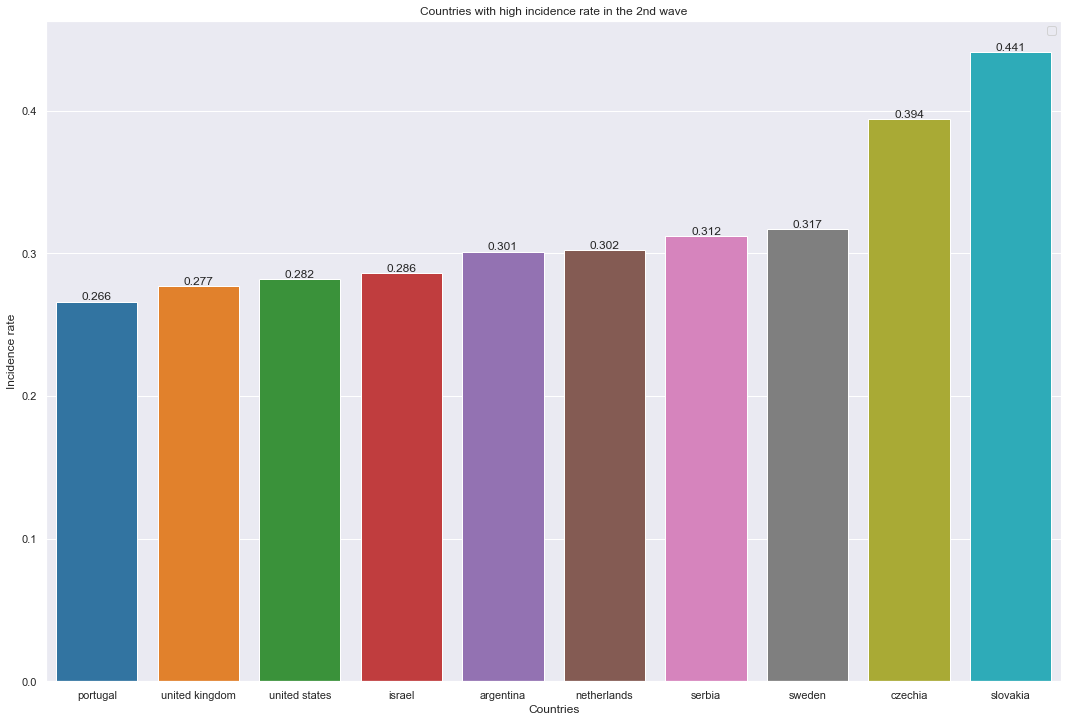

In [7]:
fig_dims = (15, 10)
#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(rc={'figure.figsize':(15,10)})

fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x='location', y='incidence rate',
                 data=data_incidence,
                 errwidth=0, palette="tab10")
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.title('Countries with high incidence rate in the 2nd wave')
plt.xlabel('Countries')
plt.ylabel('Incidence rate')
plt.legend(frameon = True)
plt.show()

In [8]:
countries = ['portugal', 'united kingdom', 'united states','israel', 'argentina', 'netherlands', 'serbia', 'sweden', 'czechia', 'slovakia']
data_time = data_agg[data_agg['location'].isin(countries)]
# data_early.iloc[:,7:8] = data_early.iloc[:,7:8].div(data_early['Population'], axis=0).round(1)
data_time

,date,location,new_cases,new_deaths,icu_patients,population,weekly_hosp_admissions,weekly_icu_admissions,total_tests,total_vaccinations,total_boosters,hospital_beds_per_thousand,people_vaccinated_per_hundred,people_fully_vaccinated,total_boosters_per_hundred,Population
97,2020-12-31,argentina,200981.0,4515.0,99848.0,1.413781e+09,0.0,0.0,1.439185e+08,1.045050e+05,3.0,155.00,0.23,3.100000e+01,0.00,45195777.0
98,2021-01-31,argentina,301725.0,4729.0,107281.0,1.413781e+09,0.0,0.0,1.809252e+08,6.730830e+06,751.0,155.00,13.27,6.738430e+05,0.00,45195777.0
99,2021-02-28,argentina,180126.0,3991.0,92251.0,1.276963e+09,0.0,0.0,2.023130e+08,2.064231e+07,1403.0,140.00,30.72,6.634659e+06,0.00,45195777.0
100,2021-03-31,argentina,241456.0,3893.0,102050.0,1.413781e+09,0.0,0.0,2.646820e+08,8.654687e+07,3356.0,155.00,154.26,1.620272e+07,0.00,45195777.0
101,2021-04-30,argentina,628542.0,8007.0,126591.0,1.368175e+09,0.0,0.0,3.151514e+08,1.912702e+08,3927.0,150.00,364.89,2.485814e+07,0.00,45195777.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,2021-04-30,united states,1888954.0,23962.0,280344.0,9.987452e+09,1135556.0,0.0,1.215167e+10,6.635332e+09,123638.0,83.10,1215.36,2.721206e+09,0.00,331002647.0
3089,2021-05-31,united states,924302.0,18358.0,230038.0,1.032037e+10,820567.0,0.0,1.362088e+10,9.055049e+09,231597.0,85.87,1530.64,4.151993e+09,0.00,331002647.0
3090,2021-06-30,united states,400355.0,10570.0,124344.0,9.987452e+09,443185.0,0.0,1.388953e+10,9.853007e+09,288972.0,83.10,1616.80,4.702765e+09,0.00,331002647.0
3091,2021-07-31,united states,1324020.0,8848.0,202267.0,1.032037e+10,783820.0,0.0,1.494126e+10,1.074684e+10,336129.0,85.87,1750.72,5.184708e+09,0.00,331002647.0


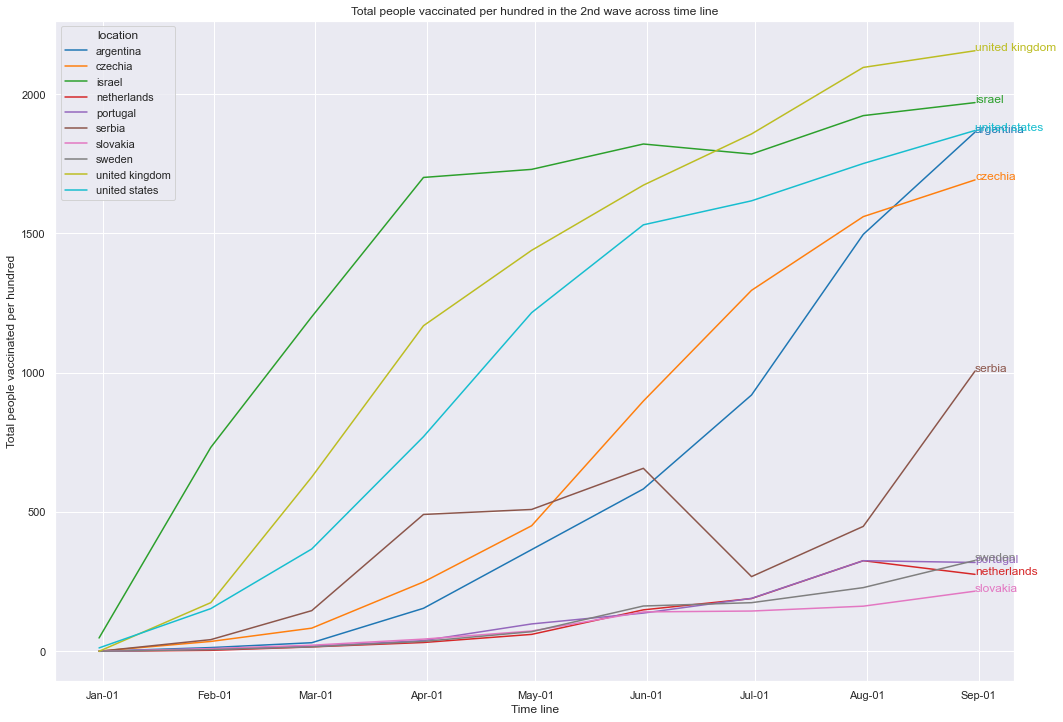

In [9]:
#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(rc={'figure.figsize':(15,10)})

# Make a plot
fig, ax = plt.subplots()

# Add lines to it
from matplotlib import rcParams

rcParams['figure.figsize'] = 20,15
sns.lineplot(ax=ax, data=data_time, x="date", y="people_vaccinated_per_hundred", hue="location", legend=True, palette="tab10")

# Add the text--for each line, find the end, annotate it with a label, and
# adjust the chart axes so that everything fits on.
for line, name in zip(ax.lines, data_time.location.unique().tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(name,
               xy=(x, y),
               xytext=(0, 0),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * .5)

# Format the date axis to be prettier.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.AutoDateLocator(interval_multiples=False))
plt.tight_layout()
plt.title('Total people vaccinated per hundred in the 2nd wave across time line')
plt.xlabel('Time line')
plt.ylabel('Total people vaccinated per hundred')
plt.show()

In [10]:
population_dict = dict(zip(df_population['Men.Region, subregion, country or area *'], df_population['Total Population']))
data_early["Population"] = data_early["location"].map(population_dict)
# data_early['incident_rate'] = data_early.iloc[:,2].div(data_early['Population'], axis=0).round(2)
# data_early['death/case'] = data_early.iloc[:,3].div(data_early['total_cases'], axis=0).round(2)
data_boost = data_early[(data_early['date'] >= '2021-08-31') & (data_early['date'] <= '2022-03-31')]
countries = ['portugal', 'united kingdom', 'united states','israel', 'argentina', 'netherlands', 'serbia', 'sweden', 'czechia', 'slovakia']
data_booster = data_boost[data_boost['location'].isin(countries)]
data_booster.date = pd.DatetimeIndex(data_booster.date)
data_booster

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date,location,new_cases,new_deaths,icu_patients,population,weekly_hosp_admissions,weekly_icu_admissions,total_tests,total_vaccinations,total_boosters,hospital_beds_per_thousand,people_vaccinated_per_hundred,people_fully_vaccinated,total_boosters_per_hundred,Population
105,2021-08-31,argentina,255856.0,6091.0,105453.0,1.413781e+09,0.0,0.0,6.564286e+08,1.199460e+09,2.434300e+04,155.00,1863.43,3.496055e+08,0.00,45195777.0
106,2021-09-30,argentina,71282.0,3367.0,53616.0,1.368175e+09,0.0,0.0,7.018927e+08,1.473495e+09,4.076600e+04,150.00,1931.82,5.930922e+08,0.00,45195777.0
107,2021-10-31,argentina,31905.0,771.0,25966.0,1.413781e+09,0.0,0.0,7.682627e+08,1.771421e+09,2.361310e+05,155.00,2185.22,7.775544e+08,0.53,45195777.0
108,2021-11-30,argentina,41941.0,639.0,17850.0,1.368175e+09,0.0,0.0,7.797711e+08,1.979872e+09,3.299171e+07,150.00,2402.17,8.553494e+08,72.33,45195777.0
109,2021-12-31,argentina,323660.0,580.0,23837.0,1.413781e+09,0.0,0.0,8.468224e+08,2.300955e+09,1.261891e+08,155.00,2592.78,9.974146e+08,276.67,45195777.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,2021-11-30,united states,2548199.0,34337.0,357494.0,9.987452e+09,1189256.0,0.0,1.957570e+10,1.361553e+10,1.095317e+09,83.10,2060.90,5.976470e+09,329.91,331002647.0
3096,2021-12-31,united states,6251661.0,43578.0,488941.0,1.032037e+10,1826377.0,0.0,2.166276e+10,1.548255e+10,1.981747e+09,85.87,2233.78,6.400556e+09,596.90,331002647.0
3097,2022-01-31,united states,20264478.0,63276.0,747595.0,1.032037e+10,4230489.0,0.0,2.364984e+10,1.659113e+10,2.646712e+09,85.87,2317.39,6.570380e+09,797.17,331002647.0
3098,2022-02-28,united states,3955578.0,61768.0,404168.0,9.321622e+09,1890554.0,0.0,2.271796e+10,1.550773e+10,2.666656e+09,77.56,2133.50,6.047710e+09,803.20,331002647.0


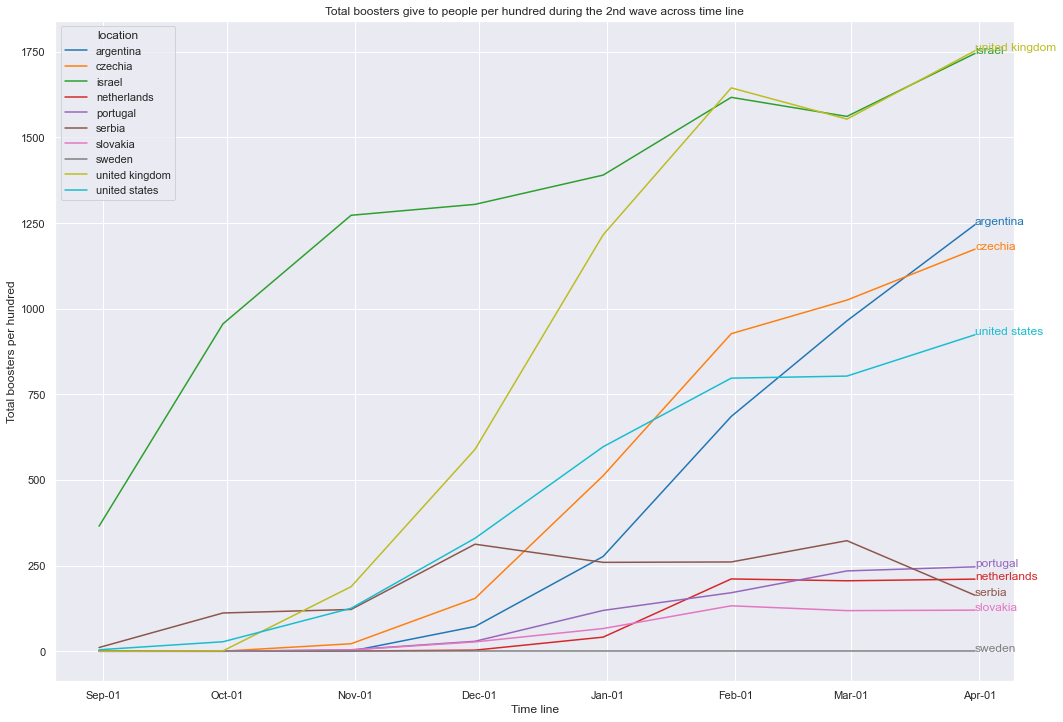

In [11]:
#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(rc={'figure.figsize':(15,10)})

# Make a plot
fig, ax = plt.subplots()

# Add lines to it
from matplotlib import rcParams

rcParams['figure.figsize'] = 20,15
sns.lineplot(ax=ax, data=data_booster, x="date", y="total_boosters_per_hundred", hue="location", legend=True, palette="tab10")

# Add the text--for each line, find the end, annotate it with a label, and
# adjust the chart axes so that everything fits on.
for line, name in zip(ax.lines, data_booster.location.unique().tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(name,
               xy=(x, y),
               xytext=(0, 0),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * .5)

# Format the date axis to be prettier.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.AutoDateLocator(interval_multiples=False))
plt.tight_layout()
plt.title('Total boosters give to people per hundred during the 2nd wave across time line')
plt.xlabel('Time line')
plt.ylabel('Total boosters per hundred')
plt.show()

In [12]:
data_grouped_mean = data_early_year.groupby(['location']).mean().reset_index()
countries = ['portugal', 'united kingdom', 'united states','israel', 'argentina', 'netherlands', 'serbia', 'sweden', 'czechia', 'slovakia']
data_mean = data_grouped_mean[data_grouped_mean['location'].isin(countries)]
data_mean

,location,new_cases,new_deaths,icu_patients,population,weekly_hosp_admissions,weekly_icu_admissions,total_tests,total_vaccinations,total_boosters,hospital_beds_per_thousand,people_vaccinated_per_hundred,people_fully_vaccinated,total_boosters_per_hundred,Population
3,argentina,1880543.5,36541.0,592135.0,6.247998e+09,0.0,0.0,1.609653e+09,1.610701e+09,32248.0,685.000,2712.780,3.734975e+08,0.000,2.033810e+08
26,czechia,579052.5,11062.5,94594.5,1.469264e+09,362739.5,36382.0,2.442573e+09,5.513763e+08,150.5,908.310,3131.695,2.214361e+08,0.000,4.819042e+07
47,israel,364607.0,2089.5,21202.0,1.272867e+09,96305.5,8015.0,1.913210e+09,1.126918e+09,16988347.5,409.630,6453.930,5.102973e+08,182.845,3.894993e+07
66,netherlands,709506.0,4330.0,66736.0,2.352714e+09,147857.5,26307.5,1.519068e+09,1.426777e+08,4.5,454.840,525.105,5.655662e+07,0.000,7.710693e+07
79,portugal,369933.0,6619.0,41001.0,1.393005e+09,0.0,0.0,1.408702e+09,9.221105e+07,0.0,464.430,566.455,3.829344e+07,0.000,4.588518e+07
85,serbia,293747.5,2844.0,19119.5,9.414019e+08,0.0,0.0,4.851887e+08,2.204637e+08,376610.0,768.433,1783.155,9.755636e+07,5.480,3.931816e+07
88,slovakia,329210.0,5854.5,33196.0,7.465500e+08,0.0,0.0,3.483216e+09,3.775857e+07,135.0,797.340,405.455,1.584639e+07,0.000,2.456839e+07
96,sweden,441842.0,4007.5,29604.5,1.391942e+09,0.0,0.0,1.070798e+09,8.337534e+07,0.0,304.140,509.435,3.008868e+07,0.000,4.544672e+07
107,united kingdom,2588238.0,37067.0,165205.0,9.344375e+09,1052564.5,0.0,1.856377e+10,5.957237e+09,0.0,347.980,5594.185,2.141606e+09,0.000,3.054870e+08
108,united states,12877615.5,184790.5,1924622.0,4.560937e+10,7305342.5,0.0,5.359494e+10,2.705176e+10,7970900.0,379.490,4642.600,1.212150e+10,2.220,1.489512e+09


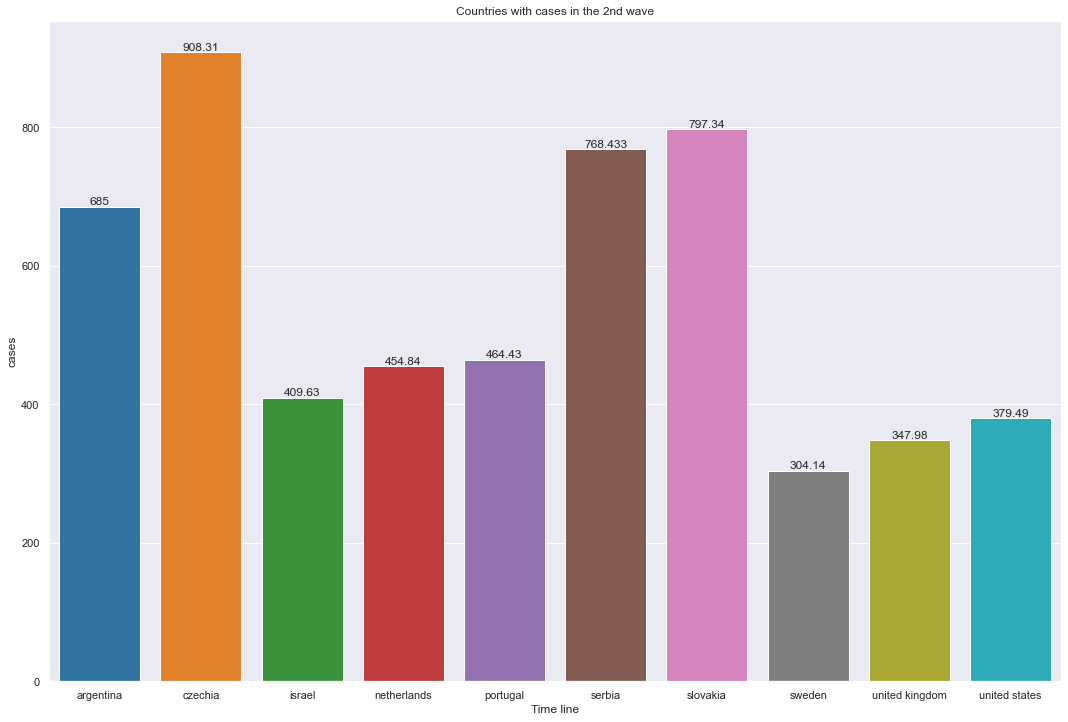

In [13]:
fig_dims = (15, 10)
#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(rc={'figure.figsize':(15,10)})

fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x='location', y='hospital_beds_per_thousand',
                 data=data_mean,
                 errwidth=0, palette="tab10")
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.title('Countries with cases in the 2nd wave')
plt.xlabel('Time line')
plt.ylabel('cases')
plt.show()

In [20]:
data_grouped_mean = data_early_year.groupby(['location']).mean().reset_index()
countries = ['portugal', 'united kingdom', 'united states','israel', 'argentina', 'netherlands', 'serbia', 'sweden', 'czechia', 'slovakia']
data_mean = data_grouped_mean[data_grouped_mean['location'].isin(countries)]
data_mean['death/population'] = data_grouped.iloc[:,2].div(data_grouped['population'], axis=0).round(8)
data_mean['death/population'] = data_mean['death/population']*10000
data=data_mean.sort_values('death/population').tail(10)
data

/var/folders/r1/5w6c9dw572lfs4_lj28w_ht80000gn/T/ipykernel_20367/3072012965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mean['death/population'] = data_grouped.iloc[:,2].div(data_grouped['population'], axis=0).round(8)
/var/folders/r1/5w6c9dw572lfs4_lj28w_ht80000gn/T/ipykernel_20367/3072012965.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mean['death/population'] = data_mean['death/population']*10000


,location,new_cases,new_deaths,icu_patients,population,weekly_hosp_admissions,weekly_icu_admissions,total_tests,total_vaccinations,total_boosters,hospital_beds_per_thousand,people_vaccinated_per_hundred,people_fully_vaccinated,total_boosters_per_hundred,Population,death/population
47,israel,364607.0,2089.5,21202.0,1.272867e+09,96305.5,8015.0,1.913210e+09,1.126918e+09,16988347.5,409.630,6453.930,5.102973e+08,182.845,3.894993e+07,0.0164
66,netherlands,709506.0,4330.0,66736.0,2.352714e+09,147857.5,26307.5,1.519068e+09,1.426777e+08,4.5,454.840,525.105,5.655662e+07,0.000,7.710693e+07,0.0184
96,sweden,441842.0,4007.5,29604.5,1.391942e+09,0.0,0.0,1.070798e+09,8.337534e+07,0.0,304.140,509.435,3.008868e+07,0.000,4.544672e+07,0.0288
85,serbia,293747.5,2844.0,19119.5,9.414019e+08,0.0,0.0,4.851887e+08,2.204637e+08,376610.0,768.433,1783.155,9.755636e+07,5.480,3.931816e+07,0.0302
107,united kingdom,2588238.0,37067.0,165205.0,9.344375e+09,1052564.5,0.0,1.856377e+10,5.957237e+09,0.0,347.980,5594.185,2.141606e+09,0.000,3.054870e+08,0.0397
108,united states,12877615.5,184790.5,1924622.0,4.560937e+10,7305342.5,0.0,5.359494e+10,2.705176e+10,7970900.0,379.490,4642.600,1.212150e+10,2.220,1.489512e+09,0.0405
79,portugal,369933.0,6619.0,41001.0,1.393005e+09,0.0,0.0,1.408702e+09,9.221105e+07,0.0,464.430,566.455,3.829344e+07,0.000,4.588518e+07,0.0475
3,argentina,1880543.5,36541.0,592135.0,6.247998e+09,0.0,0.0,1.609653e+09,1.610701e+09,32248.0,685.000,2712.780,3.734975e+08,0.000,2.033810e+08,0.0585
26,czechia,579052.5,11062.5,94594.5,1.469264e+09,362739.5,36382.0,2.442573e+09,5.513763e+08,150.5,908.310,3131.695,2.214361e+08,0.000,4.819042e+07,0.0753
88,slovakia,329210.0,5854.5,33196.0,7.465500e+08,0.0,0.0,3.483216e+09,3.775857e+07,135.0,797.340,405.455,1.584639e+07,0.000,2.456839e+07,0.0784


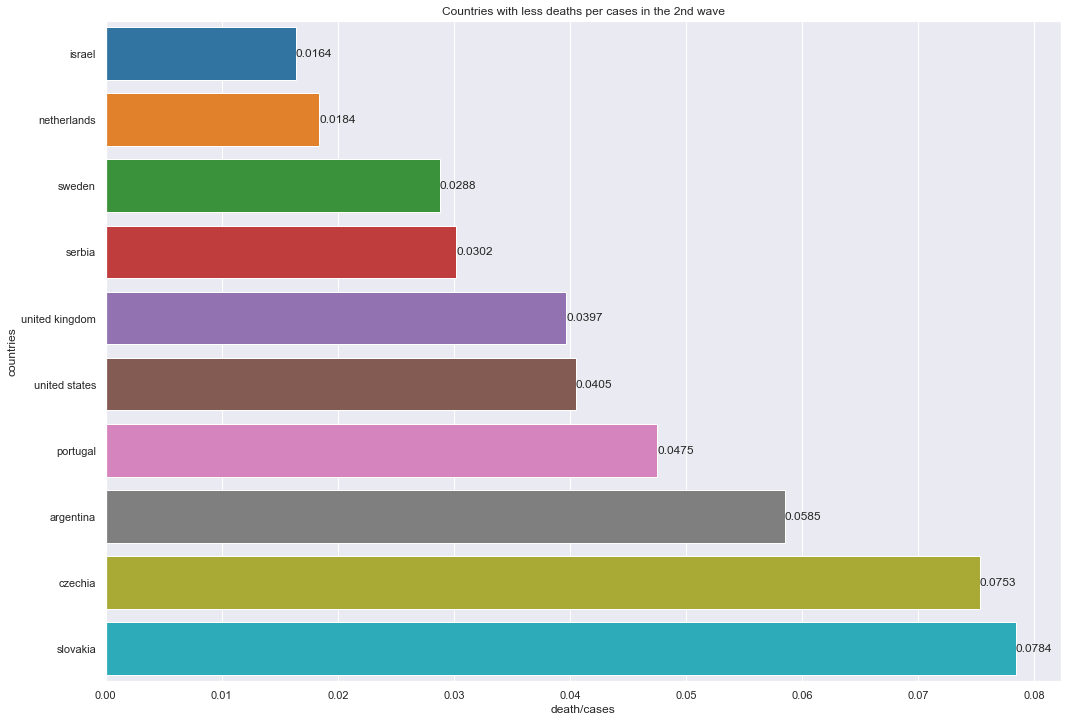

In [24]:
fig_dims = (15, 10)
#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(rc={'figure.figsize':(15,10)})

fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x='death/population', y='location',
                 data=data,
                 errwidth=0, palette="tab10")
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.title('Countries with less deaths per cases in the 2nd wave')
plt.xlabel('death/cases')
plt.ylabel('countries')
plt.show()